In [1]:
import os
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../src')
sys.path.append('../../src')
from Library import VerboseLibrary
from ActivityClassifier import PatientTrendAwareThresholder
import matplotlib.colors as mcolors

named_colors = list(mcolors.TABLEAU_COLORS)

device = 'cpu'#torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Load Models

In [2]:
model_names = sorted(os.listdir('./models_PTAT'))
len(model_names)

10

In [3]:
model_coefficient_history = {}
model_coefficient_mask = {}
model_coefficients = {}

for name in tqdm(model_names):
    model = torch.load(os.path.join('.', 'models_PTAT', name)).to(device)
    model_coefficient_history[name] = np.array(model.coefficient_history)
    model_coefficients[name] = np.array(model.coefficient_mask.detach().cpu().numpy() * model.coefficients.detach().cpu().numpy())
    model_coefficient_mask[name] = np.array(model.coefficient_mask)

100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


# Coefficients

In [4]:
masked_coefficient_list = np.array([model_coefficients[name] for name in model_names])
masked_coefficient_list_str = np.array([model_coefficients[name].round(2).astype(str) for name in model_names], dtype=object)

In [ ]:
len(np.nonzero(masked_coefficient_list)[0]) / 10

12.0

In [6]:
masked_coefficient_list_str[np.abs(masked_coefficient_list) <= 0.005] = '<0.005'
masked_coefficient_list_str[masked_coefficient_list == 0] = '-'

In [7]:
pd.DataFrame(masked_coefficient_list_str[:, :, 0], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1     z_1     z_2    z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3  \
0      -   -8.02       -  -7.73       -       -     1.2       -   -1.71   
1  -7.43    -2.7       -      -       -       -       -       -    3.35   
2      -  -10.04  -10.83      -       -       -   -0.04       -       -   
3      -   -0.99       -      -       -    0.08       -       -    9.05   
4  -8.32  -11.22       -   6.04       -       -    1.41       -    1.46   
5      -   -9.92  -10.56      -       -       -       -       -       -   
6      -  -10.09   10.51      -       -       -   -0.06       -       -   
7  13.25  -11.74       -    7.4       -       -   -1.31       -    0.44   
8  -6.98    -1.1       -      -       -       -   -0.19    6.18       -   
9   7.47   -3.67   -5.58   4.76    0.28    1.21       -       -    -0.8   

  z_3*z_3 z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3  \
0       -           -           -           -       -0.07           -   
1       -           -           -           -           -           -   
2       -           -           -           -           -           -   
3       -           -           -           -           -           -   
4       -           -           -           -       -0.09           -   
5       -           -           -           -           -           -   
6       -           -           -           -           -           -   
7       -       -0.04           -           -           -           -   
8   -2.89           -           -           -           -           -   
9       -           -           -           -           -           -   

  z_1*z_3*z_3 z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0           -           -           -           -           -  
1           -           -           -           -           -  
2           -           -           -           -           -  
3           -           -           -           -           -  
4           -           -           -           -           -  
5           -           -           -           -           -  
6           -           -           -           -           -  
7           -           -           -           -           -  
8           -           -           -           -           -  
9       -0.08           -           -           -           -

In [8]:
pd.DataFrame(masked_coefficient_list_str[:, :, 1], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1    z_1    z_2    z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0  8.08   4.73  -3.84   5.51       -       -    0.76       -    -1.2       -   
1     -      -  -0.96      -       -       -    -9.6       -       -       -   
2     -      -  -0.79      -       -       -    8.73       -   -0.09       -   
3  7.61      -  -2.67      -       -       -    -3.2       -       -       -   
4     -  -6.39      -    6.4       -       -   -1.36       -   -1.48       -   
5     -      -  -1.04      -       -       -   -9.23       -    0.06       -   
6     -      -   -0.7      -       -       -   -9.28       -   -0.06       -   
7     -      -      -  -5.66       -       -   -3.41       -    1.33       -   
8  2.47    5.6      -  -5.87       -   -1.91    -1.3    0.15       -       -   
9  3.89      -      -      -   -7.61       -       -       -    0.16    3.21   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0           -           -           -           -           -           -   
1           -           -           -           -           -           -   
2           -           -           -           -           -           -   
3           -           -           -           -           -           -   
4           -       -0.06           -           -           -           -   
5           -           -           -           -           -           -   
6           -           -           -           -           -           -   
7           -           -           -           -           -           -   
8           -           -           -           -           -           -   
9           -       -0.11           -           -           -           -   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0       -0.09           -           -           -  
1           -           -           -           -  
2           -           -           -           -  
3           -           -           -           -  
4           -           -           -           -  
5           -           -           -           -  
6           -           -           -           -  
7           -           -           -           -  
8       -0.08           -           -           -  
9           -           -           -           -

In [9]:
pd.DataFrame(masked_coefficient_list_str[:, :, 2], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()])

1   z_1    z_2     z_3 z_1*z_1 z_1*z_2 z_1*z_3 z_2*z_2 z_2*z_3 z_3*z_3  \
0  -4.74     -      -   -0.92   -3.38       -       -    7.92       -       -   
1      -     -  10.43   -9.98       -       -       -       -       -       -   
2  -7.64     -      -    -2.7       -   -3.05       -       -       -       -   
3      -  10.6      -   -9.94       -       -       -       -       -       -   
4  -5.11     -      -   -1.61    -4.7       -       -    5.46       -       -   
5   7.55     -      -   -2.66       -    2.69       -       -       -       -   
6  -7.39     -      -   -2.73       -    3.03       -       -       -       -   
7   1.79     -      -   -1.32    4.74    5.16       -    -2.7       -       -   
8  -5.21  5.19      -  -11.59       -    2.75    1.83       -       -       -   
9      -     -   7.87   -8.89       -    1.63       -       -   -1.25       -   

  z_1*z_1*z_1 z_1*z_1*z_2 z_1*z_1*z_3 z_1*z_2*z_2 z_1*z_2*z_3 z_1*z_3*z_3  \
0           -           -           -           -           -           -   
1           -           -           -           -           -           -   
2           -           -           -           -           -           -   
3           -           -           -           -           -           -   
4           -           -           -           -           -           -   
5           -           -           -           -           -           -   
6           -           -           -           -           -           -   
7           -           -           -           -           -           -   
8           -           -           -           -           -           -   
9           -           -           -           -           -           -   

  z_2*z_2*z_2 z_2*z_2*z_3 z_2*z_3*z_3 z_3*z_3*z_3  
0           -           -           -           -  
1           -           -           -           -  
2           -           -           -           -  
3           -           -           -           -  
4           -           -           -           -  
5           -           -           -           -  
6           -           -           -           -  
7           -           -           -           -  
8           -           -           -           -  
9           -           -           -           -

In [10]:
for i in range(3): pd.DataFrame(masked_coefficient_list_str[:, :, i], columns=['*'.join(l) for l in VerboseLibrary(model.library).build_verbose()]).to_csv(f'./PTAT_lorenz_coefficients_j{i}')

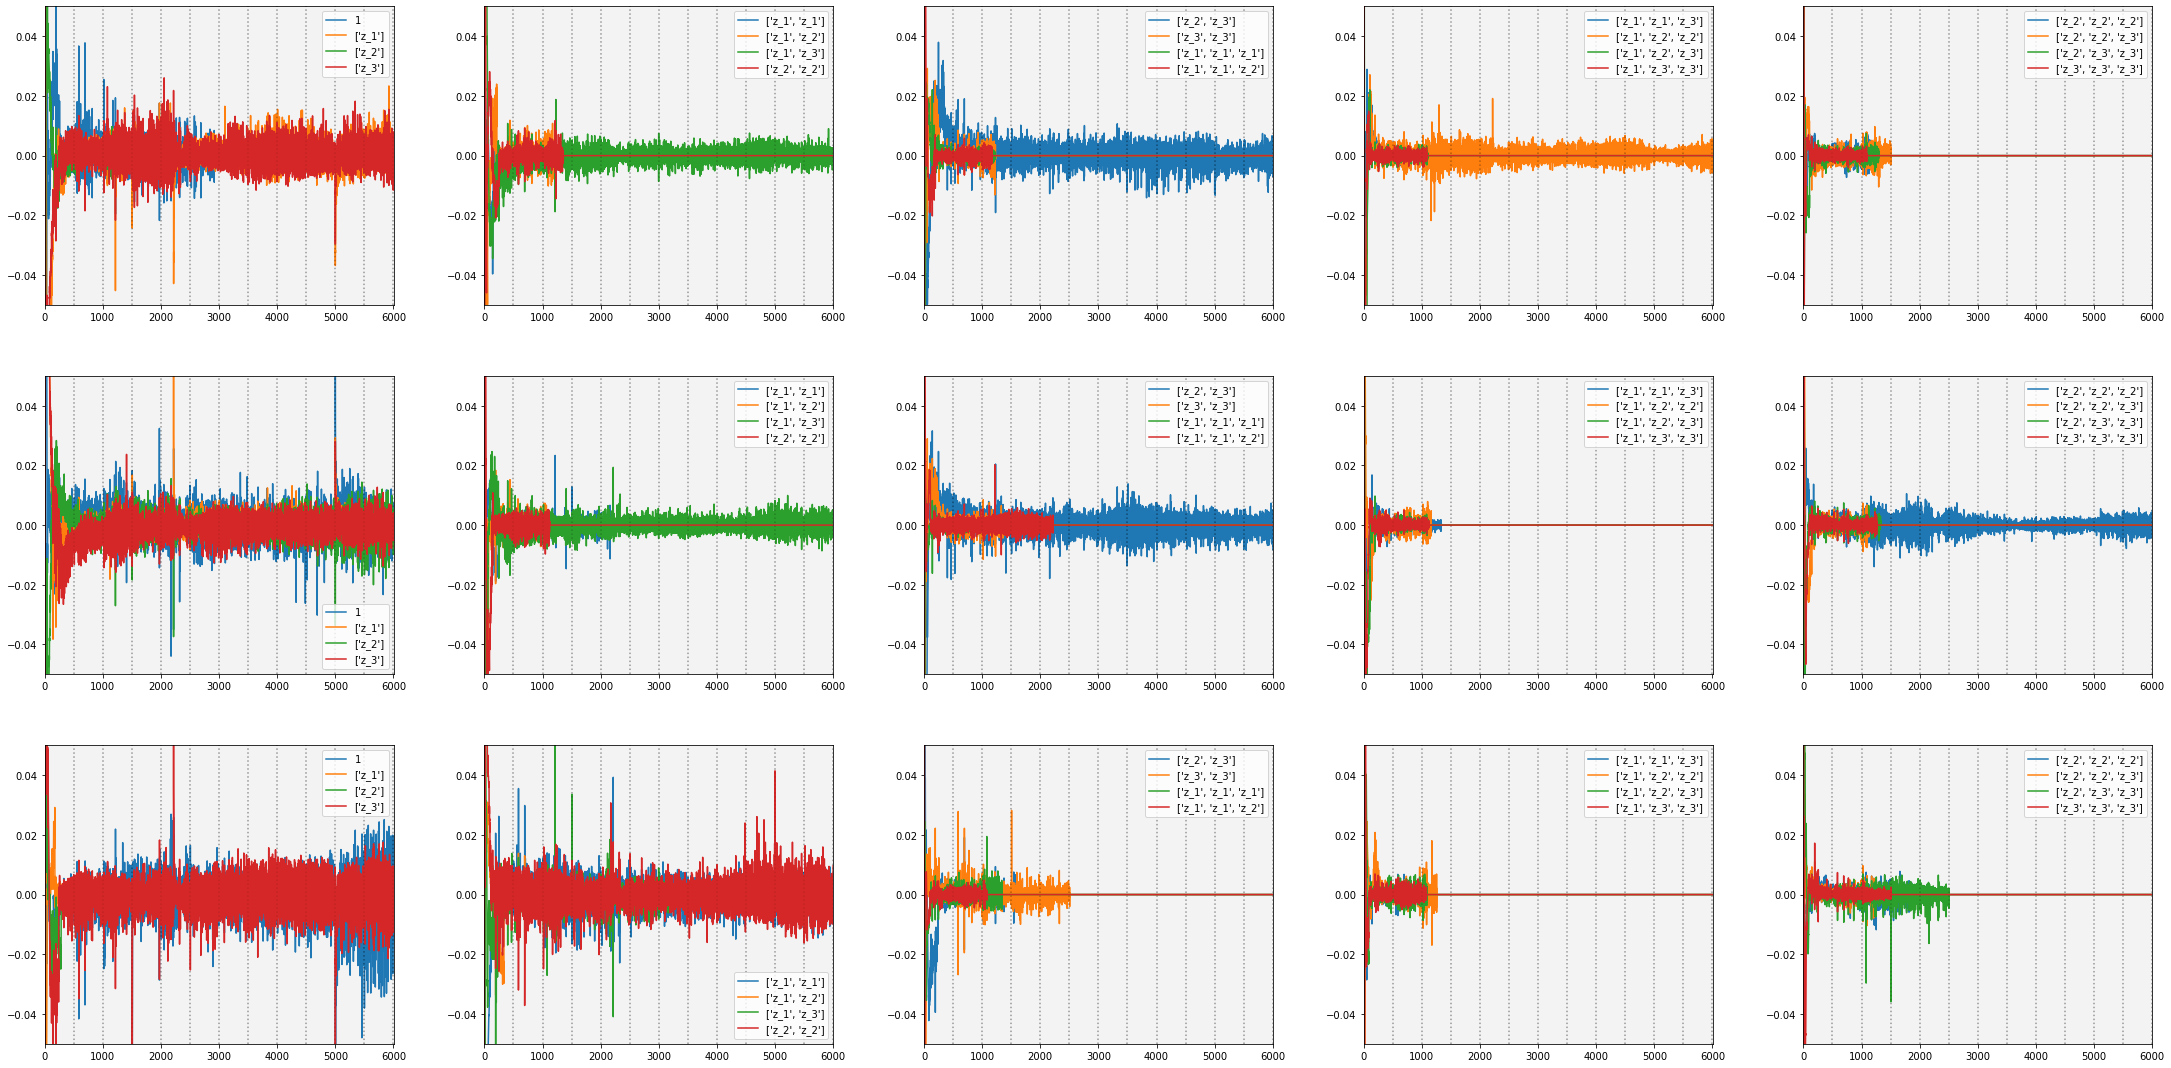

In [11]:
m = model_names[0]
xlim = 6002
split_size = 4

fig, ax = plt.subplots(3, 5, figsize=(30, 15))
fig.tight_layout(w_pad=6, h_pad=5)

for split in range(5):
    for j in range(3):
        for i, (n, c) in enumerate(
            zip(VerboseLibrary(model.library).build_verbose()[split*split_size:(split+1)*split_size],
            model_coefficient_history[m][:, :, j].reshape(6002, 20).T[split*split_size:(split+1)*split_size],
            )):
            ax[j][split].plot(np.diff(c[:xlim], axis=0).T, label=n, color=named_colors[i%len(named_colors)])
            ax[j][split].legend(); ax[j][split].axhspan(-0.1, 0.1, color='black', alpha=0.01); ax[j][split].set_xlim(0, xlim); ax[j][split].set_ylim(-0.05, 0.05)
            for threshold_epoch in np.arange(500, xlim, 500): ax[j][split].axvline(threshold_epoch, color='black', alpha=0.1, linestyle=':')

# Thresholding

In [8]:
def trend(a, lengthscale=5):
    mean_diff_last_values, var_last_values = np.mean(a[-2*lengthscale:-lengthscale], axis=0), np.var(a[-2*lengthscale:-lengthscale], axis=0)
    mean_diff_now_values, var_now_values = np.mean(a[-lengthscale:], axis=0), np.var(a[-lengthscale:], axis=0)
    return mean_diff_now_values - mean_diff_last_values, np.sqrt(var_last_values + var_now_values)

In [9]:
def trend_speed(a, lengthscale=5):
    if a.shape[0] > 2*lengthscale:
        return trend(a, lengthscale)[0]
    return np.zeros(a.shape[1:])

In [10]:
def trend_significance(a, lengthscale=5):
    if a.shape[0] > 2*lengthscale:
        t = trend(a, lengthscale)
        r = np.copy(t[0])
        r[(t[0] != 0) & (t[1] == 0)] = np.nan
        r[(t[0] != 0) & (t[1] != 0)] = t[0][(t[0] != 0) & (t[1] != 0)] / t[1][(t[0] != 0) & (t[1] != 0)]
        return r
    return np.zeros(a.shape[1:])

In [11]:
model_trend_significances = {}
model_trend_speed = {}
model_diff = {}
for name in model_names:
    model_trend_significances[name] = np.stack([trend_significance(model_coefficient_history[name][:i]) for i in range(6000)])
    model_trend_speed[name] = np.stack([trend_speed(model_coefficient_history[name][:i]) for i in range(6000)])
    model_diff[name] = np.diff(model_coefficient_history[name], axis=0)

In [12]:
model_classified_history = {}
model_classified_plus_history = {}

for name in tqdm(model_names):
    ptat = PatientTrendAwareThresholder(trend_threshold=0.02)
    model_classified_history[name] = np.stack([ptat.classify_converged(model_coefficient_history[name][:i])[0] for i in range(1, len(model_coefficient_history[name]))])

100%|██████████| 10/10 [00:01<00:00,  9.40it/s]


In [13]:
# model_coefficient_activity_history = {name: (model_coefficient_history[name][1:] - model_coefficient_history[name][:-1]).astype(bool) for name in model_names}
model_thresholded_epochs = {name: np.where((model_classified_history[name][1:].astype(bool) & ~model_classified_history[name][:-1].astype(bool))) for name in model_names}
model_before_thresholded_epochs = {name: (model_thresholded_epochs[name][0] - 5, model_thresholded_epochs[name][1], model_thresholded_epochs[name][2]) for name in model_names}

model_before_thresholded_epochs[model_names[2]]

(array([1030, 1053, 1127, 1157, 1170, 1175, 1175, 1193, 1203, 1224, 1302,
        1314, 1335, 1336, 1360, 1379, 1390, 1394, 1395, 1400, 1431, 1449,
        1465, 1492, 1495, 1525, 1561, 1576, 1578, 1581, 1586, 1595, 1600,
        1630, 1735, 1776, 1785, 1789, 1791, 1852, 1940, 2017, 2179, 2432,
        2702, 2790, 2792, 2792, 3090, 3101, 3153, 3264, 3297]),
 array([14, 13, 18, 18, 16,  5, 10, 12, 15,  3, 14, 11, 19, 12, 13,  9, 17,
        19, 14,  8, 19,  6,  4, 15, 11,  5, 13, 16,  4,  5, 10, 15,  7,  3,
        18, 10, 17, 12, 16,  4,  7,  0,  9, 17,  9,  8,  6,  7, 11,  1,  2,
         0,  1]),
 array([2, 2, 2, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0,
        1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2,
        0, 1, 2, 1, 1, 1, 0, 1, 2]))

In [14]:
model_thresholded_trend_speed_values = {name: model_trend_speed[name][model_before_thresholded_epochs[name]] for name in model_names}
model_thresholded_trend_significance_values = {name: model_trend_significances[name][model_thresholded_epochs[name]] for name in model_names}
model_thresholded_coefficient_values = {name: model_coefficient_history[name][model_thresholded_epochs[name]] for name in model_names}
model_thresholded_diff_values = {name: model_diff[name][model_thresholded_epochs[name]] for name in model_names}

In [15]:
all_models_thresholded_coefficient_values = []
all_models_thresholded_trend_significance_values = []
all_models_thresholded_trend_speed_values = []
all_models_thresholded_diff_values = []

for name in model_names:
    all_models_thresholded_coefficient_values.extend(model_thresholded_coefficient_values[name])
    all_models_thresholded_trend_significance_values.extend(model_thresholded_trend_significance_values[name])
    all_models_thresholded_trend_speed_values.extend(model_thresholded_trend_speed_values[name])
    all_models_thresholded_diff_values.extend(model_thresholded_diff_values[name])

In [16]:
reasonable_cutoff = 0.2/5 # coefficient may change by double the ST-Zone in 5000 epochs
unreasonable_cutoff = 0.2/0.1 # coefficient may change by double the ST-Zone in 100 epochs

In [17]:
ptat_used_trend_threshold = 0.02 # per epoch

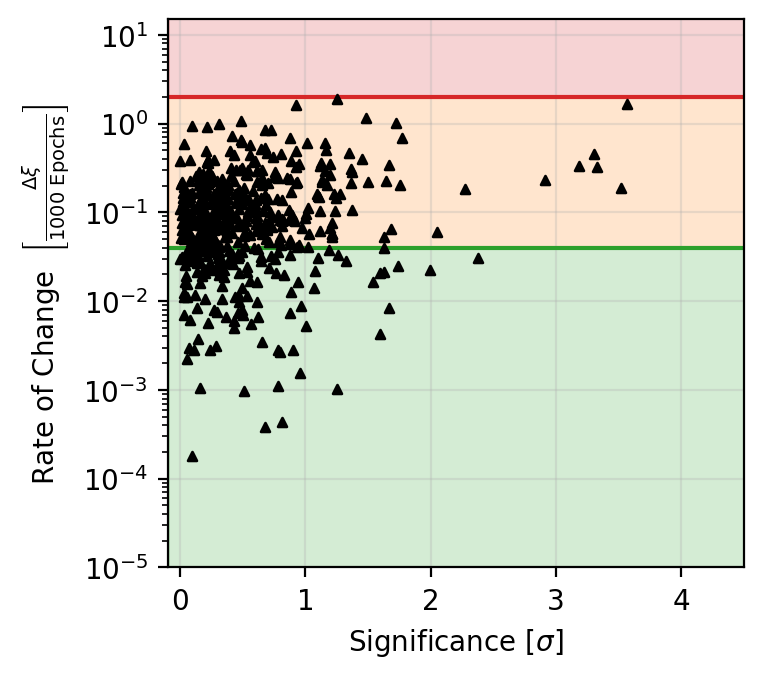

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6.5/1.8, 6/1.8), dpi=200)
fig.tight_layout(w_pad=5)

# dm in 5 Epochs 
# 200 * dm in 1000 Epochs
ax.scatter(np.abs(all_models_thresholded_trend_significance_values), np.abs(all_models_thresholded_trend_speed_values) * 200, color='black', marker='^', s=10, zorder=3);
ax.set_ylabel(r'Rate of Change  $\left[\frac{\Delta \xi}{1000 \,\,\mathrm{Epochs}}\right]$'); ax.set_xlabel(r'Significance $[\sigma]$'); ax.set_yscale('log'); ax.grid(alpha=0.3, zorder=1);
ax.axhspan(1e-6, reasonable_cutoff, color='tab:green', alpha=0.2);
ax.axhspan(reasonable_cutoff, unreasonable_cutoff, color='tab:orange', alpha=0.2);
ax.axhspan(unreasonable_cutoff, 100, color='tab:red', alpha=0.2);
ax.axhline(unreasonable_cutoff, color='tab:red')
ax.axhline(reasonable_cutoff, color='tab:green')
# multiply with 1e3 to get b in 1000 epochs
# ax.axhline(1e3*ptat_used_trend_threshold, color='black', alpha=0.5, linestyle='--', label=r'$b = 0.02$')
ax.set_ylim(1e-5, 15), ax.set_xlim(-0.1, 4.5);
# ax.legend(); 